In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm

## 3.2 Conditioning
Manufacturing Bayes

Three types of machines make the production. 
First type makes 30%, second 50%, and third 20% of the production.
Probability of an item being conforming is 0.94 if it comes from type 1 machine, 0.95 from type 2 machine, and 0.97 from type 3 machine.

An item from the production is selected at random.

(a) What is the probability that it was conforming?

(b) If it was found that the item is conforming, what is the probability that it was produced on
a type 1  machine?

***

Hand Calculation:
(a) P(A) = 0.94 * 0.3 + 0.95 * 0.5 + 0.97 * 0.2 = 0.957

In [6]:
# 1000 items simulate an item is conforming
products = [] 
for i in range(1000): 
    if i < 300:
        products.append("Type_1")
    elif 300 <= i < 800:
        products.append("Type_2")
    else:
        products.append("Type_3")
def Conform(total, conform_rate):
    l = []
    for i in range(total):
        if i < total * conform_rate:
            l.append(True)
        else:
            l.append(False)
    return l

Type_1_Conform = Conform(300, 0.94)
Type_2_Conform = Conform(500, 0.95)
Type_3_Conform = Conform(200, 0.97)

In [20]:
# (a)
import random

simulation = []
for i in range(10000):
    rand = random.randint(0, 999)
    prod = products[rand]
    if prod == "Type_1":
        if rand < 282:
            simulation.append(1)
        else:
            simulation.append(0)
    elif prod == "Type_2":
        if 300 <= rand < 775:
            simulation.append(1)
        else:
            simulation.append(0)
    else:
        if 800 <= rand < 994:
            simulation.append(1)
        else:
            simulation.append(0)
print('Item Conforming:', sum(simulation) / len(simulation))

Item Conforming: 0.9534


In [23]:
# (b)
def Conform_Type():
    type_1 = []
    type_2 = []
    type_3 = []
    for i in range(10000):
        rand = random.randint(0, 999)
        if rand < 282:
            type_1.append(1)
        elif 300 <= rand < 775:
            type_2.append(1)
        elif 800 <= rand < 994:
            type_3.append(1)
    return type_1, type_2, type_3

t1, t2, t3 = Conform_Type() 
print("Total Conformed Products", len(t1+t2+t3))
print("Conformed Product From Type 1", len(t1) / len(t1+t2+t3))
print("Conformed Product From Type 2", len(t2) / len(t1+t2+t3))
print("Conformed Product From Type 3", len(t3) / len(t1+t2+t3))

Total Conformed Products 9504
Conformed Product From Type 1 0.29292929292929293
Conformed Product From Type 2 0.5075757575757576
Conformed Product From Type 3 0.1994949494949495


## 3.3 Bayes Formula

Example Two-headed Coin

In [27]:
def pro_2H(N, k):
    '''
    N: number of coins
    k: flip times
    '''
    return 2 ** k / ((N-1) + 2 ** k)

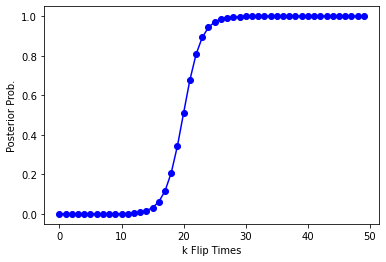

In [46]:
# 1000000 coins
N = 1000000 # prior
y_post = []
x_flip = []
for k in range(0, 50):
    x_flip.append(k)
    y_post.append(pro_2H(N, k))

plt.plot(x_flip, y_post, marker='o', c = 'b')
plt.ylabel("Posterior Prob.")
plt.xlabel("k Flip Times")
plt.show()

## 3.4 Basic Bayes Networks

ALARM

Your house has an alarm system against burglary.
The house is located in the seismically active area and the alarm system
can get occasionally set off by an earthquake. You have two
neighbors, Mary and John, who do not know each other. If
they hear the alarm they call you, but this is not guaranteed.
They also call you from time to time just to chat. The BUGS 
code provides an approximate solution for conditional 
distributions of nodes given the evidence.


(a) P(J|E)

(b) P(E|J)

(c) P(E|J^c, M)

Practice: Find  P(B|A,M^c)

![Screen Shot 2020-08-25 at 4.04.13 PM.png](https://github.com/CYLiu2019/MS_Stat_Repo/blob/master/ISyE6420%20Bayesian%20Statistics/Demo/Screen%20Shot%202020-08-25%20at%204.04.13%20PM.png)
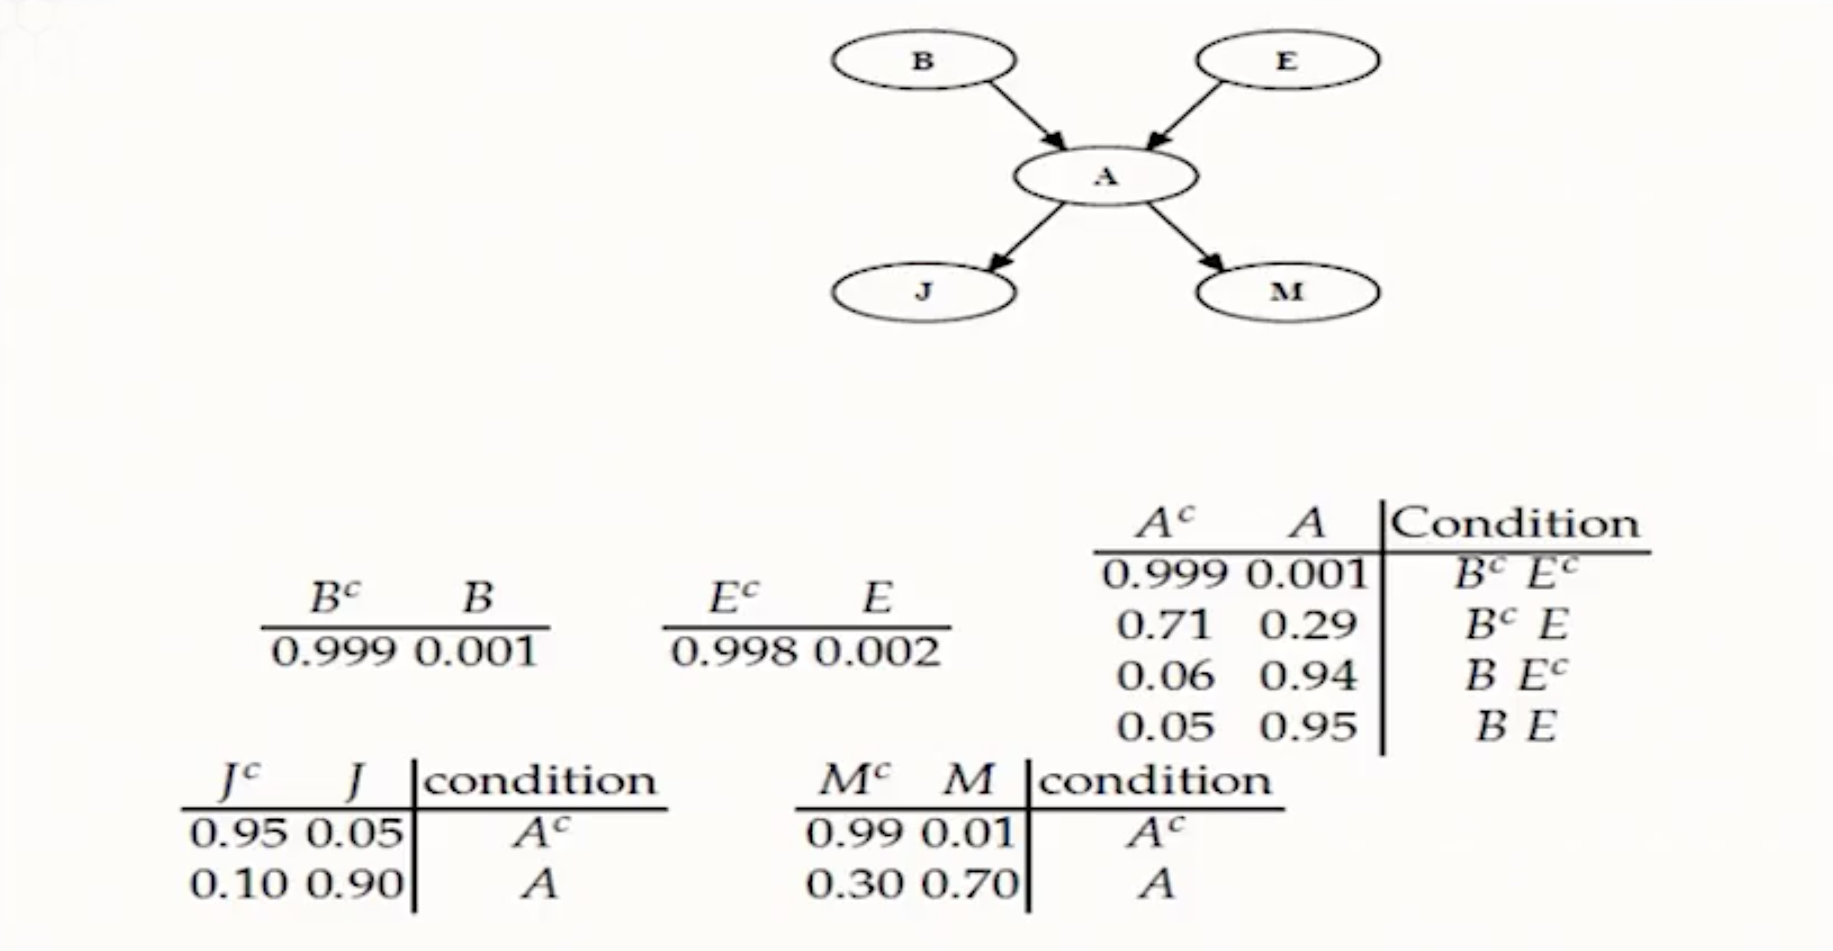

In [3]:
from pomegranate import *

In [6]:
burg = DiscreteDistribution({"Burged": 0.001, "Non-burged": 0.999})
earth = DiscreteDistribution({"Quake": 0.002, "Non-quake": 0.998})

alarm = ConditionalProbabilityTable(
        [["Burged", "Quake", "Alarm", 0.95],
         ["Burged", "Quake", "Non-alarm", 0.05],
         ["Burged", "Non-quake", "Alarm", 0.94],
         ["Burged", "Non-quake", "Non-alarm", 0.06],
         ["Non-burged", "Quake", "Alarm", 0.29],
         ["Non-burged", "Quake", "Non-alarm", 0.71],         
         ["Non-burged", "Non-quake", "Alarm", 0.001], 
         ["Non-burged", "Non-quake", "Non-alarm", 0.999]], [burg, earth])

JohnCall = ConditionalProbabilityTable(
            [["Alarm", "JohnCall", 0.90],
             ["Alarm", "JohnNotCall", 0.10],
             ["Non-alarm", "JohnCall", 0.05],
             ["Non-alarm", "JohnNotCall", 0.05]], [alarm])

MaryCall = ConditionalProbabilityTable(
            [["Alarm", "MaryCall", 0.70],
             ["Alarm", "MaryNotCall", 0.30],
             ["Non-alarm", "MaryCall", 0.01],
             ["Non-alarm", "MaryNotCall", 0.99]], [alarm])

In [7]:
s1 = State(burg, name="burg")
s2 = State(earth, name="earth")
s3 = State(alarm, name="Alarm")
s4 = State(JohnCall, name="JohnCall")
s5 = State(MaryCall, name="MaryCall")

In [8]:
# Create the Bayesian network object with a useful name
model = BayesianNetwork("Alarm Problem")

# Add the three states to the network 
model.add_states(s1, s2, s3, s4, s5)

In [9]:
model.add_edge(s1, s3) #S1 parent S3 alarm child
model.add_edge(s2, s3)
model.add_edge(s3, s4)
model.add_edge(s3, s5)

In [10]:
model.bake()

In [16]:
#(a) P(J|E)
model.predict_proba([None, "Quake", None, None, None])

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Burged" :0.002641083646300607,
            "Non-burged" :0.9973589163536994
        }
    ],
    "frozen" :false
},
       'Quake',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Alarm" :0.8038297095637648,
            "Non-alarm" :0.1961702904362353
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "JohnCall" :0.8215318838255059,
            "JohnNotCall" :0.1784681161744941
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "MaryNotCall" :0.43535750040100235,
            "MaryCall" :0.5646424995989976
        }
   

In [17]:
#(b) P(E|J)
model.predict_proba([None, None, None, "JohnCall", None])

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Burged" :0.01628372994677687,
            "Non-burged" :0.9837162700532232
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Quake" :0.011394968773813555,
            "Non-quake" :0.9886050312261864
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Alarm" :0.04343771179993891,
            "Non-alarm" :0.956562288200061
        }
    ],
    "frozen" :false
},
       'JohnCall',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "MaryNotCall" :0.9600279788580421,
            "MaryCall" :0.03997202114195793
        }
    

In [18]:
#(c) P(E|J^c, M)
model.predict_proba([None, None, None, "JohnNotCall", "MaryCall"])

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Burged" :0.09754348824146039,
            "Non-burged" :0.9024565117585397
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Quake" :0.06134566107240363,
            "Non-quake" :0.9386543389275963
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Alarm" :0.2610058384702186,
            "Non-alarm" :0.7389941615297814
        }
    ],
    "frozen" :false
},
       'JohnNotCall', 'MaryCall'], dtype=object)

In [19]:
# Practice: Find  P(B|A,M^c)
model.predict_proba([None, None, "Alarm", None, "MaryNotCall"])

array([{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Burged" :0.3735512282818995,
            "Non-burged" :0.6264487717181005
        }
    ],
    "frozen" :false
},
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Quake" :0.23100870196890536,
            "Non-quake" :0.7689912980310947
        }
    ],
    "frozen" :false
},
       'Alarm',
       {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "JohnCall" :0.8999999999999998,
            "JohnNotCall" :0.10000000000000016
        }
    ],
    "frozen" :false
},
       'MaryNotCall'], dtype=object)